# Machine Learning Classification Quiz

Previous steps:

In [1]:
import pandas as pd

df = pd.read_csv( 'Data_for_UCI_named.csv' )

In [2]:
df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [3]:
df.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [4]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [6]:
#encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['stabf']= encoder.fit_transform(df['stabf'])

In [7]:
X = df.drop(columns= 'stabf' )
X = X.drop(columns= 'stab' )
y = df[ 'stabf' ]

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2 , random_state= 1 )
y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

In [9]:
x_test.head(5)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
9394,2.927250,2.422885,3.538161,4.138394,2.554873,-1.476525,-0.560759,-0.517589,0.123158,0.919761,0.902984,0.246253
898,8.717797,2.063950,5.605202,1.906483,4.688925,-1.081859,-1.881534,-1.725531,0.241479,0.941283,0.251092,0.577665
2398,9.469112,5.391403,7.627119,1.517214,4.137451,-1.129479,-1.983112,-1.024860,0.508570,0.342558,0.643358,0.134542
5906,8.954336,0.773566,4.164793,6.589719,3.745118,-0.870429,-1.053599,-1.821090,0.669562,0.151877,0.758348,0.611977
2343,7.859965,3.267539,9.776655,6.538294,3.349879,-1.337714,-1.436115,-0.576049,0.734077,0.604733,0.314029,0.573387


In [51]:
#SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)

In [31]:
#normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalised_train_df = scaler.fit_transform(x_train_balanced)
normalised_train_df = pd.DataFrame(normalised_train_df,
columns=x_train_balanced.columns)

normalised_test_df = scaler.transform(x_test)
normalised_test_df = pd.DataFrame(normalised_test_df,
columns=x_test.columns)

## P14. What is the accuracy on the test set using the random forest classifier? In 4 decimal places

In [26]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score, confusion_matrix


In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier()

rf_base.fit(normalised_train_df, y_balanced)


new_predictions = rf_base.predict(normalised_test_df)


In [53]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions)
print( round(accuracy,4)) 

0.9095


## P15. What is the accuracy on the test set using the XGboost classifier? In 4 decimal places.

In [37]:
import xgboost as xgb
from xgboost import XGBClassifier
xgbclf = xgb.XGBClassifier()
xgbclf.fit(normalised_train_df, y_balanced)

new_predictions2 = xgbclf.predict(normalised_test_df)


In [38]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions2)
print(round(accuracy,4))

0.9415


## P16. What is the accuracy on the test set using the LGBM classifier? In 4 decimal places.

In [19]:
import sys
!{sys.executable} -m pip install lightgbm
import lightgbm

In [20]:
from lightgbm import LGBMClassifier
model = LGBMClassifier()

model.fit(normalised_train_df, y_balanced)

new_predictions3 = model.predict(normalised_test_df)

In [ ]:
accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions3)
print( accuracy) #value: 0.9326

## P17. Using the ExtraTreesClassi er as your estimator with cv=5, n_iter=10, scoring = 'accuracy', n_jobs = -1, verbose = 1 and random_state = 1. What are the best hyperparameters from the randomized search CV?

In [39]:
%%time

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV


clf = ExtraTreesClassifier()
clf.fit(normalised_train_df, y_balanced)


N_estimators= [100,300,500,1000]
min_samples_split =[2,5,7]
min_samples_leaf =[4,6,8]
max_features =['auto','log2','None']

params= dict(
                      n_estimators=N_estimators,
                      min_samples_split=min_samples_split,
                      min_samples_leaf=min_samples_leaf,
                      max_features=max_features
                 )

clf_GS = RandomizedSearchCV(estimator=clf,cv=5, param_distributions=params, n_iter=10,scoring ='accuracy', n_jobs = -1, verbose = 1, random_state = 1)
clf_GS.fit(normalised_train_df, y_balanced)


print(f'Best F1-score: {clf_GS.best_score_} \nBest param: {clf_GS.best_params_}') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\User\anaconda3\lib\site-packages\joblib\

Best F1-score: 0.9432454889070854 
Best param: {'n_estimators': 1000, 'min_samples_split': 5, 'min_samples_leaf': 6, 'max_features': 'log2'}
Wall time: 1min 33s


## P18. Train a new ExtraTreesClassi er Model with the new Hyperparameters from the RandomizedSearchCV (with random_state = 1). Is the accuracy of the new optimal model higher or lower than the initial ExtraTreesClassi er model with no hyperparameter tuning?

In [43]:
new_predictions4 = clf.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions4)
print( round(accuracy,4))

0.9285


In [46]:
#New Extra tree Classifier
new_clf = ExtraTreesClassifier(n_estimators=1000, min_samples_split=5, min_samples_leaf=6, max_features="log2")
new_clf.fit(normalised_train_df, y_balanced)
new_predictions5 = new_clf.predict(normalised_test_df)

accuracy = accuracy_score(y_true=y_test, y_pred=new_predictions5)
print( accuracy) 

0.915


## P20. Find the feature importance using the optimal ExtraTreesClassifier model. Which features are the most and least important respectively?


<AxesSubplot:>

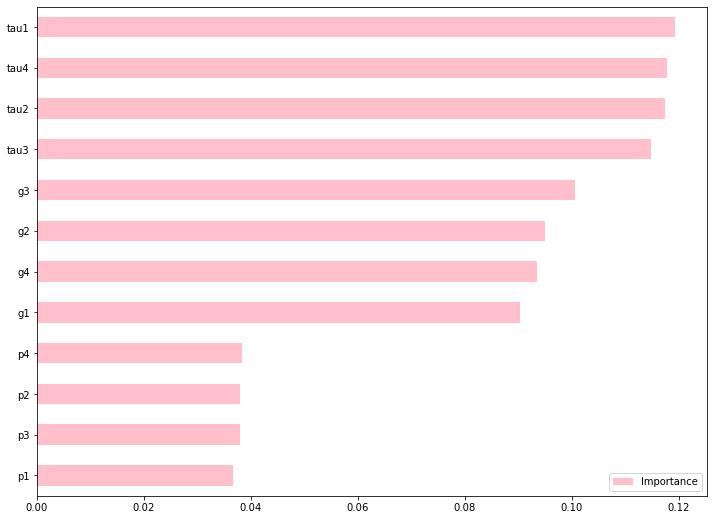

In [50]:
import matplotlib as plt
features_log = pd.DataFrame(clf.feature_importances_, index = X.columns.tolist(), 
                            columns = ['Importance'])
features_log = features_log.sort_values(by='Importance', ascending=True)

features_log.plot(kind='barh', figsize=(12,9), color = 'pink')